In [48]:
import os
import pandas as pd

def load_ohlcv_data(symbol_list, interval_list, load_folder='data/raw'):
    loaded_data = {}

    for symbol in symbol_list:
        for interval in interval_list:
            current_load_path = os.path.join(load_folder, f'{symbol}_{interval}.json')

            # Check if the file exists
            if os.path.exists(current_load_path):
                # Load the data from the JSON file
                loaded_data[f'{symbol}_{interval}'] = pd.read_json(current_load_path)
                print(f"Data loaded for {symbol} - {interval} from {current_load_path}")
            else:
                print(f"No data file found for {symbol} - {interval} at {current_load_path}")

    return loaded_data

In [50]:
import pandas as pd
import requests
import json
import datetime

def fetch_ohlcv(symbol, interval, start_time, end_time):
    start_time = int(start_time.timestamp() * 1000) # Convert to milliseconds
    end_time = int(end_time.timestamp() * 1000) # Convert to milliseconds

    url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&startTime={start_time}&endTime={end_time}&limit=1000"

    raw_data = requests.get(url).text
    data = json.loads(raw_data)
    df = pd.DataFrame(data, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'trades', 'taker_buy_base', 'taker_buy_quote', 'ignored'])

    # Convert times to more readable format
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

        # Convert prices and volume to float
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)

    df = df[['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time']]  # Keep only OHLCV data

    return df

In [57]:
import json
import os

def fetch_ohlcv_multi(symbol_list, interval_list, start_time, end_time, save_folder='data/raw'):
    # Create a directory for storing data files
    os.makedirs(save_folder, exist_ok=True)

    for symbol in symbol_list:
        for interval in interval_list:
            current_save_path = os.path.join(save_folder, f'{symbol}_{interval}.json')

            # Check if data already exists for this pair and timeframe
            #if os.path.exists(current_save_path):
            #    print(f"Data already exists for {symbol} - {interval}. Skipping...")
            #    continue

            # Initialize start time for each pair and interval
            current_start_time = start_time

            # Initialize an empty DataFrame for the current pair and interval
            full_data = pd.DataFrame()

            # Loop to fetch data in the required range
            while current_start_time < end_time:
                new_data = fetch_ohlcv(symbol, interval, current_start_time, end_time)
                
                if not new_data.empty:
                    full_data = pd.concat([full_data, new_data])
                    current_start_time = new_data.iloc[-1]['close_time']
                else:
                    print(f"No data returned for {symbol} - {interval} in the time range {current_start_time} to {end_time}")
                    break

            # Save the data to a JSON file
            full_data.to_json(current_save_path, orient='records', date_format='iso')
            print(f"Data saved for {symbol} - {interval} at {current_save_path}")

In [58]:
# scrap and save data to json files
# Example Usage:
symbol_list = ['BTCUSDT', 'BNBUSDT', 'ETHUSDT', 'MULTIUSDT', 'SOLUSDT', 'FIOUSDT', 'ALPINEUSDT', 'XRPUSDT']
interval_list = ['4h']

#start_time = datetime.datetime(2023, 12, 1, 0, 0, 0)
#end_time = datetime.datetime(2024, 1, 24, 6, 20, 0)

# Set start_time to UTC now minus one month
start_time = datetime.datetime.utcnow() - datetime.timedelta(days=30)
end_time = datetime.datetime.utcnow() 

fetch_ohlcv_multi(symbol_list, interval_list, start_time, end_time)

Data saved for BTCUSDT - 4h at data/raw\BTCUSDT_4h.json
Data saved for BNBUSDT - 4h at data/raw\BNBUSDT_4h.json
Data saved for ETHUSDT - 4h at data/raw\ETHUSDT_4h.json
Data saved for MULTIUSDT - 4h at data/raw\MULTIUSDT_4h.json
Data saved for SOLUSDT - 4h at data/raw\SOLUSDT_4h.json
Data saved for FIOUSDT - 4h at data/raw\FIOUSDT_4h.json
Data saved for ALPINEUSDT - 4h at data/raw\ALPINEUSDT_4h.json
Data saved for XRPUSDT - 4h at data/raw\XRPUSDT_4h.json


In [59]:
symbol_list = ['BTCUSDT', 'BNBUSDT', 'ETHUSDT', 'MULTIUSDT', 'SOLUSDT', 'FIOUSDT', 'ALPINEUSDT', 'XRPUSDT']
interval_list = ['4h']

loaded_data = load_ohlcv_data(symbol_list, interval_list)

Data loaded for BTCUSDT - 4h from data/raw\BTCUSDT_4h.json
Data loaded for BNBUSDT - 4h from data/raw\BNBUSDT_4h.json
Data loaded for ETHUSDT - 4h from data/raw\ETHUSDT_4h.json
Data loaded for MULTIUSDT - 4h from data/raw\MULTIUSDT_4h.json
Data loaded for SOLUSDT - 4h from data/raw\SOLUSDT_4h.json
Data loaded for FIOUSDT - 4h from data/raw\FIOUSDT_4h.json
Data loaded for ALPINEUSDT - 4h from data/raw\ALPINEUSDT_4h.json
Data loaded for XRPUSDT - 4h from data/raw\XRPUSDT_4h.json


In [54]:
loaded_data

{'BTCUSDT_4h':                open_time      open      high       low     close       volume  \
 0    2020-01-01 00:00:00   7195.24   7245.00   7175.46   7225.01  2833.749180   
 1    2020-01-01 04:00:00   7225.00   7236.27   7199.11   7209.83  2061.295051   
 2    2020-01-01 08:00:00   7209.83   7237.73   7180.00   7197.20  3166.654361   
 3    2020-01-01 12:00:00   7197.20   7255.00   7196.15   7234.19  3492.537459   
 4    2020-01-01 16:00:00   7234.20   7249.99   7214.00   7229.48  2980.583291   
 ...                  ...       ...       ...       ...       ...          ...   
 8760 2023-12-31 04:00:00  42175.99  42693.00  42156.09  42537.10  3915.107280   
 8761 2023-12-31 08:00:00  42537.10  42899.00  42369.15  42518.36  4626.120980   
 8762 2023-12-31 12:00:00  42518.36  42646.27  42352.76  42457.17  3403.651760   
 8763 2023-12-31 16:00:00  42457.17  42719.80  42436.47  42619.04  3036.191660   
 8764 2023-12-31 20:00:00  42619.04  42680.36  42056.00  42283.58  5460.309800   
 


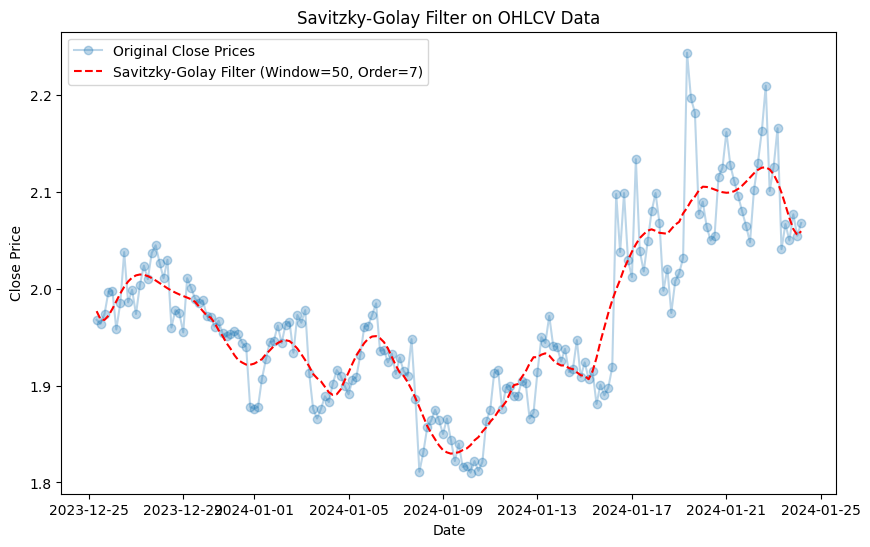

In [69]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

df = pd.DataFrame(loaded_data['ALPINEUSDT_4h'])
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)

# Extract the closing prices for smoothing
closing_prices = df['close'].values

# Apply Savitzky-Golay filter
window_length = 50  # Adjust the window length based on your data
poly_order = 7     # Adjust the polynomial order based on your data

smoothed_prices = savgol_filter(closing_prices, window_length, poly_order)

# Plot the original and smoothed closing prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, closing_prices, label='Original Close Prices', marker='o', alpha=0.3)
plt.plot(df.index, smoothed_prices, label=f'Savitzky-Golay Filter (Window={window_length}, Order={poly_order})', linestyle='dashed', color='red')
plt.title('Savitzky-Golay Filter on OHLCV Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


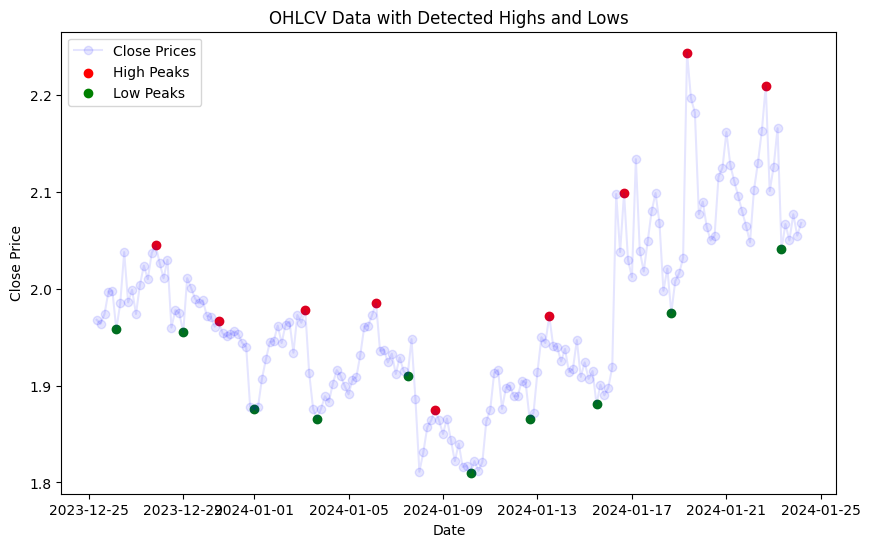

In [70]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt


df = pd.DataFrame(loaded_data['ALPINEUSDT_4h'])
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)

# Use the Close prices for peak detection
close_prices = df['close'].values

# Find peaks (highs) using the find_peaks function
high_peaks, _ = find_peaks(close_prices, distance=15)  # Adjust distance based on your data

# Invert the Close prices to find troughs (lows)
inverted_close_prices = -close_prices
low_peaks, _ = find_peaks(inverted_close_prices, distance=15)  # Adjust distance based on your data

# Plot the OHLCV data with different colors for highs and lows
plt.figure(figsize=(10, 6))
plt.plot(df.index, close_prices, label='Close Prices', marker='o', alpha=0.1, linestyle='-', color='blue')
plt.scatter(df.index[high_peaks], close_prices[high_peaks], color='red', label='High Peaks')
plt.scatter(df.index[low_peaks], close_prices[low_peaks], color='green', label='Low Peaks')
plt.title('OHLCV Data with Detected Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Indices of Identified PIPs: [0, 11, 22, 33, 44, 55, 66, 77, 83, 89, 100, 111, 122, 128, 134, 145, 156, 167, 173, 179]


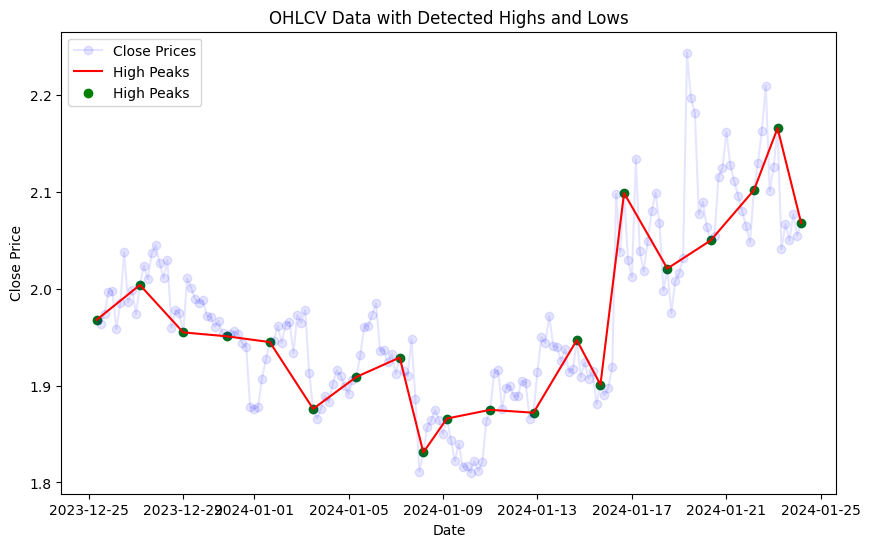

In [71]:
import numpy as np
import pandas as pd

def identify_pips(time_series, num_pips):
    # Step 1: Initialization
    pips = [0, len(time_series) - 1]  # Initialize with the first and last observations as the first two PIPs

    # Step 2 to 5: Iterative calculation of PIPs
    while len(pips) < num_pips:
        distances = [min(np.abs(i - pip) for pip in pips) for i in range(len(time_series))]
        next_pip = np.argmax(distances)
        pips.append(next_pip)

    # Step 6: Sort the identified PIPs
    pips.sort()

    return pips

# Example usage:

df = pd.DataFrame(loaded_data['ALPINEUSDT_4h'])
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)

# Use the Close prices for PIPs
close_prices = df['close'].values

# Assuming 'price_data' is your financial time series data
price_data = close_prices

# Specify the number of PIPs you want to identify
num_pips_to_identify = 20

# Call the function to get the indices of identified PIPs
identified_pips_indices = identify_pips(price_data, num_pips_to_identify)

# Print the indices of identified PIPs
print("Indices of Identified PIPs:", identified_pips_indices)

plt.figure(figsize=(10, 6))
plt.plot(df.index, close_prices, label='Close Prices', marker='o', alpha=0.1, linestyle='-', color='blue')
plt.plot(df.index[identified_pips_indices], close_prices[identified_pips_indices], color='red', label='High Peaks')
plt.scatter(df.index[identified_pips_indices], close_prices[identified_pips_indices], color='green', label='High Peaks')
#plt.scatter(df.index[low_peaks], close_prices[low_peaks], color='green', label='Low Peaks')
plt.title('OHLCV Data with Detected Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [63]:
import numpy as np
import matplotlib.pyplot as plt

def draw_fibonacci_levels(data, start_index, end_index, levels=[0.236, 0.382, 0.5, 0.618, 0.786]):
    """
    Draw Fibonacci retracement levels on a price chart.

    Parameters:
    - data: Array-like, financial time series data (e.g., closing prices).
    - start_index: Index from where to start drawing Fibonacci levels.
    - end_index: Index until where to draw Fibonacci levels.
    - levels: List of Fibonacci retracement levels to draw.

    Returns:
    - None (plots the chart).
    """

    # Extract relevant portion of data
    relevant_data = data[start_index:end_index + 1]

    # Get the high and low prices in the specified range
    high_price = np.max(relevant_data)
    low_price = np.min(relevant_data)

    # Calculate Fibonacci retracement levels
    retracement_levels = [low_price + level * (high_price - low_price) for level in levels]

    return retracement_levels



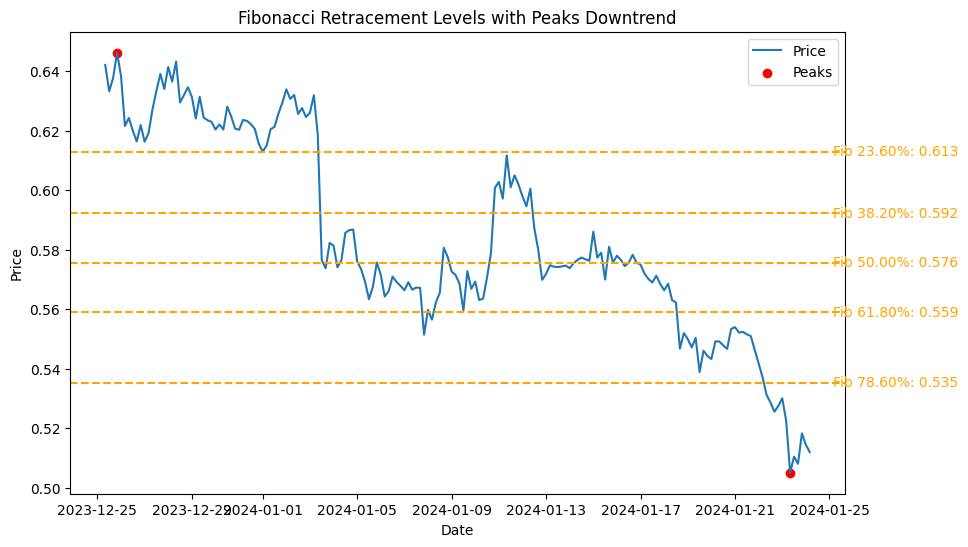

Fibonacci Retracement Levels: [0.6129004, 0.5922998, 0.57565, 0.5590002, 0.5352954]
High Price: 0.6462
Low Price: 0.5051
High Price Index: 2023-12-25 20:00:00
Low Price Index: 2024-01-23 08:00:00
Trend Label: Downtrend


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def draw_fibonacci_levels(df, start_index, end_index, levels=[0.236, 0.382, 0.5, 0.618, 0.786]):
    """
    Draw Fibonacci retracement levels on a price chart.

    Parameters:
    - df: DataFrame, financial time series data (e.g., with 'open_time' and 'close' columns).
    - start_index: Index from where to start drawing Fibonacci levels.
    - end_index: Index until where to draw Fibonacci levels.
    - levels: List of Fibonacci retracement levels to draw.

    Returns:
    - retracement_levels: List of Fibonacci retracement levels.
    - high_price: The highest price in the specified range.
    - low_price: The lowest price in the specified range.
    - high_price_index: Index of the highest price.
    - low_price_index: Index of the lowest price.
    - trend_label: String indicating the trend ('Uptrend' or 'Downtrend').
    """

    # Extract relevant portion of data
    relevant_data = df.iloc[start_index:end_index + 1]

    # Get the highest and lowest points
    high_price = relevant_data['close'].max()
    low_price = relevant_data['close'].min()

    # Get the indices of high and low prices
    high_price_index = relevant_data['close'].idxmax()
    low_price_index = relevant_data['close'].idxmin()

    # Determine the trend based on indices
    uptrend = high_price_index > low_price_index

    # Calculate Fibonacci retracement levels based on the trend
    if uptrend:
        retracement_levels = [low_price + level * (high_price - low_price) for level in levels]
        trend_label = 'Uptrend'
    else:
        retracement_levels = [high_price - level * (high_price - low_price) for level in levels]
        trend_label = 'Downtrend'

    # Scatter the high and low prices used for Fibonacci level calculation
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['close'], label='Price')

    # Plot Fibonacci retracement levels with labels
    for level, fib_level in zip(retracement_levels, levels):
        plt.axhline(y=level, color='orange', linestyle='--')
        plt.text(relevant_data.index[-1] + pd.Timedelta(days=1), level, f'Fib {fib_level * 100:.2f}%: {level:.3f}', color='orange', verticalalignment='center')


    # Scatter the high and low prices
    plt.scatter([high_price_index, low_price_index], [high_price, low_price], color='red', marker='o', label='Peaks')

    plt.title(f'Fibonacci Retracement Levels with Peaks {trend_label}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return retracement_levels, high_price, low_price, high_price_index, low_price_index, trend_label

# Example usage with your DataFrame:
# Assuming 'df' is your DataFrame with 'open_time' and 'close' columns
df = pd.DataFrame(loaded_data['XRPUSDT_4h'])
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)

# Specify the start and end indices for drawing Fibonacci levels
start_index = 0
end_index = len(df)-1

# Call the function to draw Fibonacci retracement levels and get values
levels, high_price, low_price, high_price_index, low_price_index, trend_label = draw_fibonacci_levels(df, start_index, end_index)

print("Fibonacci Retracement Levels:", levels)
print("High Price:", high_price)
print("Low Price:", low_price)
print("High Price Index:", high_price_index)
print("Low Price Index:", low_price_index)
print("Trend Label:", trend_label)

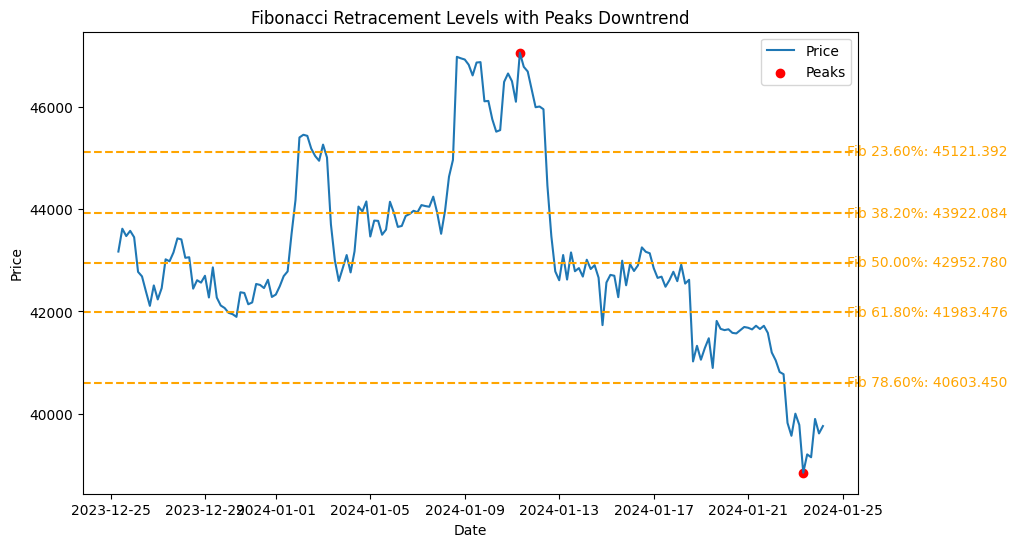

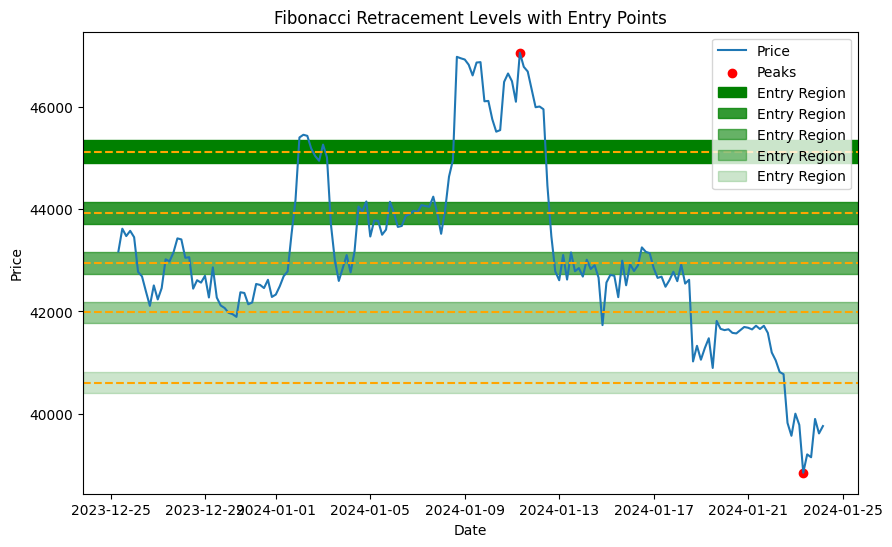

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_entry_points(df, start_index, end_index, levels=[0.236, 0.382, 0.5, 0.618, 0.786]):
    """
    Plot potential entry points based on Fibonacci retracement levels.

    Parameters:
    - df: DataFrame, financial time series data (e.g., with 'open_time' and 'close' columns).
    - start_index: Index from where to start plotting entry points.
    - end_index: Index until where to plot entry points.
    - levels: List of Fibonacci retracement levels to consider.

    Returns:
    - None (plots entry points).
    """

    # Call the function to draw Fibonacci retracement levels and get values
    retracement_levels, high_price, low_price, high_price_index, low_price_index, trend_label = draw_fibonacci_levels(df, start_index, end_index, levels)

    # Extract relevant portion of data
    relevant_data = df.iloc[start_index:end_index + 1]

    # Determine trend
    uptrend = trend_label == 'Uptrend'
    downtrend = trend_label == 'Downtrend'

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(relevant_data.index, relevant_data['close'], label='Price')

    # Plot Fibonacci retracement levels
    for level in retracement_levels:
        plt.axhline(y=level, color='orange', linestyle='--')

    # Scatter the high and low prices
    plt.scatter([high_price_index, low_price_index], [high_price, low_price], color='red', marker='o', label='Peaks')

    # Identify entry points
    entry_points = []
    if uptrend:
        entry_points = [level for level in retracement_levels if level < relevant_data['close'].iloc[-1]]
    elif downtrend:
        entry_points = [level for level in retracement_levels if level > relevant_data['close'].iloc[-1]]
    
    for i, entry_point in enumerate(entry_points):
        entry_region_height = 0.01 * entry_point  # 2% of entry level
        plt.axhspan(
            entry_point - entry_region_height/2,
            entry_point + entry_region_height/2,
            alpha=1 - (i / len(entry_points)),  # Vary alpha based on index
            color='green',
            label='Entry Region'
        )


    plt.title('Fibonacci Retracement Levels with Entry Points')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage with your DataFrame:
# Assuming 'df' is your DataFrame with 'open_time' and 'close' columns
df = pd.DataFrame(loaded_data['BTCUSDT_4h'])
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)

# Specify the start and end indices for plotting entry points
start_index = 0
end_index = len(df)-1

# Call the function to plot potential entry points
plot_entry_points(df, start_index, end_index)




In [47]:
hsar_zones

array([], dtype=int32)